In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from TRSF import trsf

Path_to_samples = '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_'
# search the directory for files with name starting with cutout_
# and ending with .fits

import glob
filesnames = glob.glob(Path_to_samples + '*.fits')
filesnames

['/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_17092.1992.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_21079.5137.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_16888.7246.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_16568.5898.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_17068.3809.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_10073.2861.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_21516.918.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_15824.7998.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_16665.1992.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_17092.2402.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_19233.1992.fits',
 '/Users/rs

In [9]:
def trsf_func(data_path,smoothing,smooth_param):
    data = trsf(data_path,gaussian_fitting=False,region_expansion=True,cutup_img=False,sigma=5,smoothing=smoothing,smooth_param=smooth_param,plot=False)
    return data

In [10]:
# rethink the plotting, here perhaps we should generate polygons around single sources, base points and top level.

In [11]:
def get_enclosing_mask(x, y, mask):
    '''
    Returns the mask of the enclosed area of the point (x,y) in the mask.
    '''
    
    # Ensure the point is inside the mask
    if not mask[y, x]:
        return None
    # Create a copy of the mask
    enclosed_mask = np.copy(mask)
    # Perform a flood fill starting from the point
    h, w = mask.shape
    stack = [(x, y)]
    while stack:
        x, y = stack.pop()
        if enclosed_mask[y, x]:
            enclosed_mask[y, x] = False
            if x > 0:
                stack.append((x - 1, y))
            if x < w - 1:
                stack.append((x + 1, y))
            if y > 0:
                stack.append((x, y - 1))
            if y < h - 1:
                stack.append((x, y + 1))
    
    return mask & (~enclosed_mask)

In [12]:
import skimage.measure as measure
def plottings(cat,ptype,color,img):
    
    label = False
    for i in range(0,len(cat)):
        row = cat.iloc[i]
        if ptype=='bbox':
            bbox = row.bbox
            if bbox != None:
                xmin = bbox[0] - 1
                xmax = bbox[2] + 1
                ymin = bbox[1] - 1
                ymax = bbox[3] + 1
                if label == False:
                    plt.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color=color,label='class 5')
                    label = True
                plt.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color=color)
        if ptype == 'point':
            plt.plot(row.y,row.x,'+',color=color)
        
        if ptype == 'polygonwith':
            polygon = row.polygon
            try:
                if label == False:
                    plt.plot(polygon[:,1],polygon[:,0],color=color,label='class 2')
                    label = True
                else:
                    plt.plot(polygon[:,1],polygon[:,0],color=color)  
            except:
                plottings(cat,'polygonwithout',color,img)  
        if ptype == 'polygonwithout':
        # we much create the polygons from the birth and death points
            birth = row.Birth
            death = row.Death
            mask = np.zeros(img.shape)
            mask = np.logical_or(mask, np.logical_and(img <= birth, img > death))
        
            mask = get_enclosing_mask(int(row.y1),int(row.x1),mask)    
            mask = mask.astype(int)
            contour = measure.find_contours(mask)[0]

            if label == False:
                plt.plot(contour[:,1],contour[:,0],color=color,label='class 2')
                label= True
            else:
                plt.plot(contour[:,1],contour[:,0],color=color)   


In [13]:
data1 = trsf_func('/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_19233.1543.fits',False,1)
catalogue = data1.catalogue
image = data1.full_img
# change any 2 to 7
#catalogue['Class'][catalogue['Class'] == 2] = 7
catalogue['Class'][np.isnan(catalogue['Class'])] = 2
cat0 = catalogue[catalogue['Class'] == 0]
cat1 = catalogue[catalogue['Class'] == 1]
cat2 = catalogue[catalogue['Class'] == 2]
cat3 = catalogue[catalogue['Class'] == 3]
cat4 = catalogue[catalogue['Class'] == 4]
cat5 = catalogue[catalogue['Class'] == 5]

   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_19233.1543.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (227, 237)
NOTICE: Image Size with reduced padding (227, 237)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed:   0%|          | 0/1 [00:00<?, ?it/s]

         Birth     Death     x1     y1     x2     y2      lifetime  new_row  \
2817  0.000125  0.000003  129.0  205.0    0.0    0.0  1.218629e-04        0   
2113  0.000064  0.000003  206.0  105.0  109.0  197.0  6.119175e-05        0   
809   0.000056  0.000003   99.0   98.0  198.0  102.0  5.296867e-05        0   
2317  0.000045  0.000003   49.0  209.0   72.0  215.0  4.223687e-05        0   
2243  0.000039  0.000003    8.0  150.0   20.0  144.0  3.551054e-05        0   
...        ...       ...    ...    ...    ...    ...           ...      ...   
69    0.000005  0.000005  133.0  140.0  137.0  147.0  1.866192e-08        1   
67    0.000005  0.000005  137.0  147.0  134.0  145.0  1.264189e-07        1   
46    0.000005  0.000005  147.0  119.0  148.0  116.0  1.934409e-07        1   
41    0.000005  0.000005  139.0  126.0  142.0  122.0  7.356539e-08        1   
167   0.000004  0.000004  127.0  117.0  130.0  116.0  7.179005e-08        1   

      parent_tag  len_enclosed  single  
2817      

Cutouts Completed: 100%|██████████| 1/1 [00:15<00:00, 15.17s/it]

TRSF finished.
Time taken: 15.189405918121338 seconds
-------------------


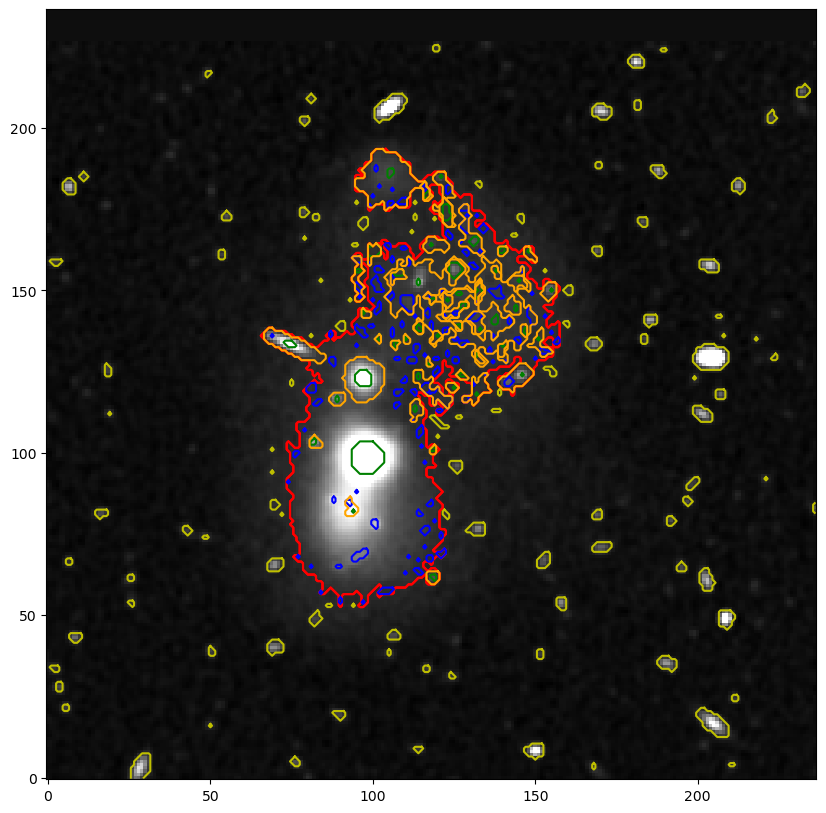

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(image,origin='lower',cmap='gray',vmax=np.nanpercentile(image,99.5))
plottings(cat2,'polygonwith',color='r',img=image)
plottings(cat0,'polygonwithout',color='b',img=image)
plottings(cat5,'polygonwithout',color='g',img=image)
plottings(cat4,'polygonwithout',color='orange',img=image)
plottings(cat3,'polygonwithout',color='purple',img=image)
plottings(cat1,'polygonwithout',color='y',img=image)
plt.show()